# Liver Disease Detection

**Brief :** 

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

**About the Dataset :**

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:



*   Age of the patient
*   Gender of the patient
*   Total Bilirubin
*   Direct Bilirubin
*   Alkaline Phosphotase
*   Alamine Aminotransferase
*   Aspartate Aminotransferase
*   Total Protiens
*   Albumin
*   Albumin and Globulin Ratio
*   Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

[Link to the Dataset](https://www.kaggle.com/uciml/indian-liver-patient-records)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


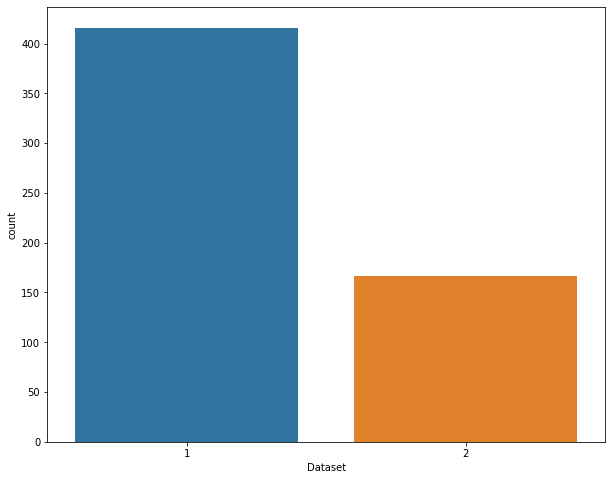

1    416
2    167
Name: Dataset, dtype: int64

In [5]:
#checking the uniformity in the test dataset
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="Dataset",data=df)
plt.show()
df["Dataset"].value_counts()

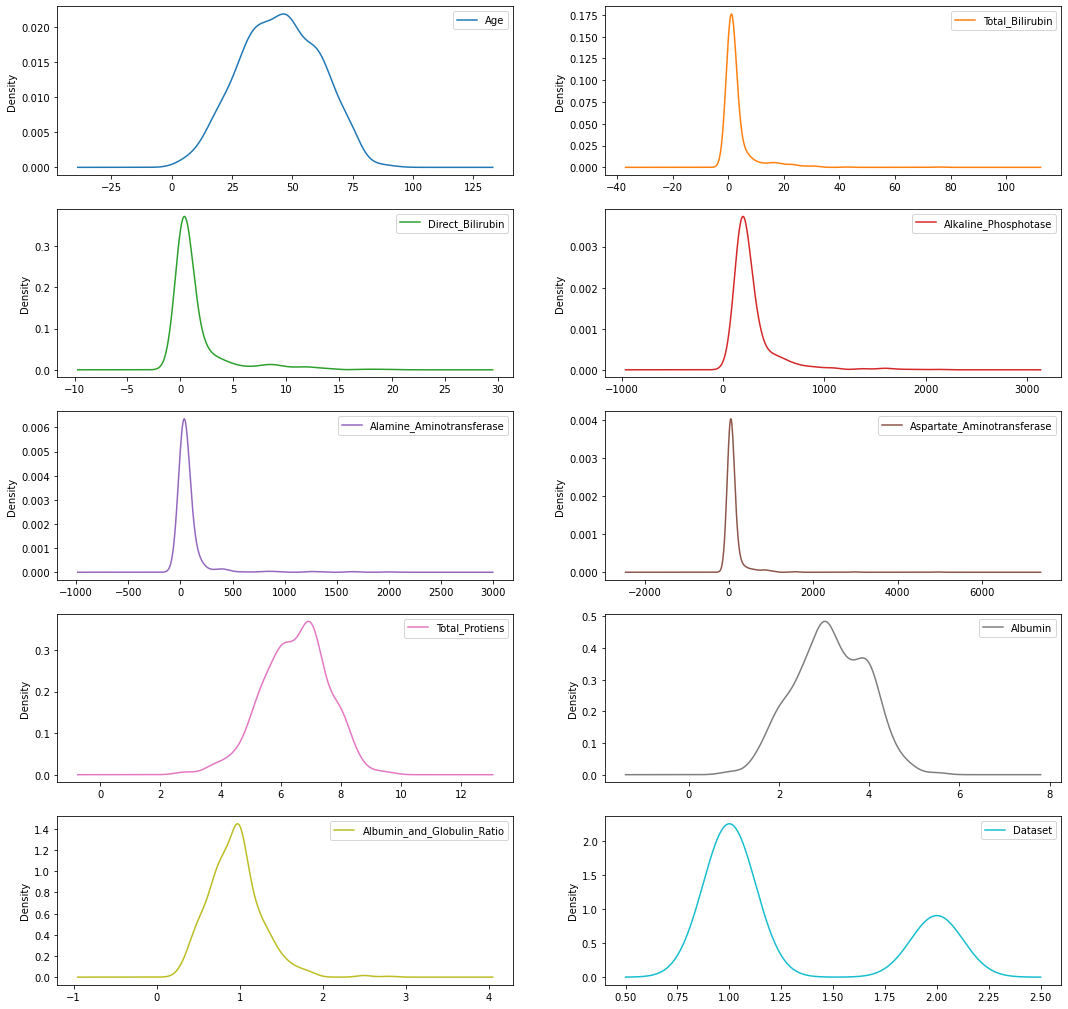

In [6]:
#Density plot for all features
df.plot(kind='density',sharex=False,subplots=True,layout=(5,2),figsize=(18,18))
plt.show()

Text(0.5, 0.98, 'Trends in Gender and Age')

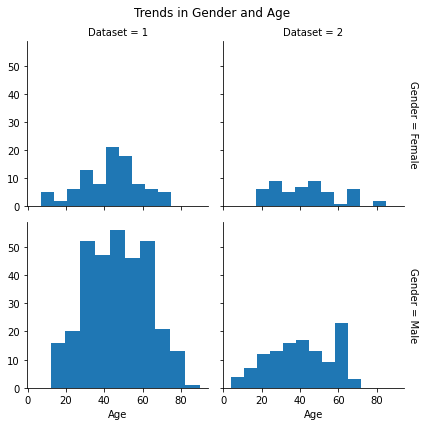

In [7]:
#Trends in Gender and Age
g = sns.FacetGrid(df,col="Dataset",row="Gender",margin_titles=True)
g.map(plt.hist,"Age")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Trends in Gender and Age')

<AxesSubplot:>

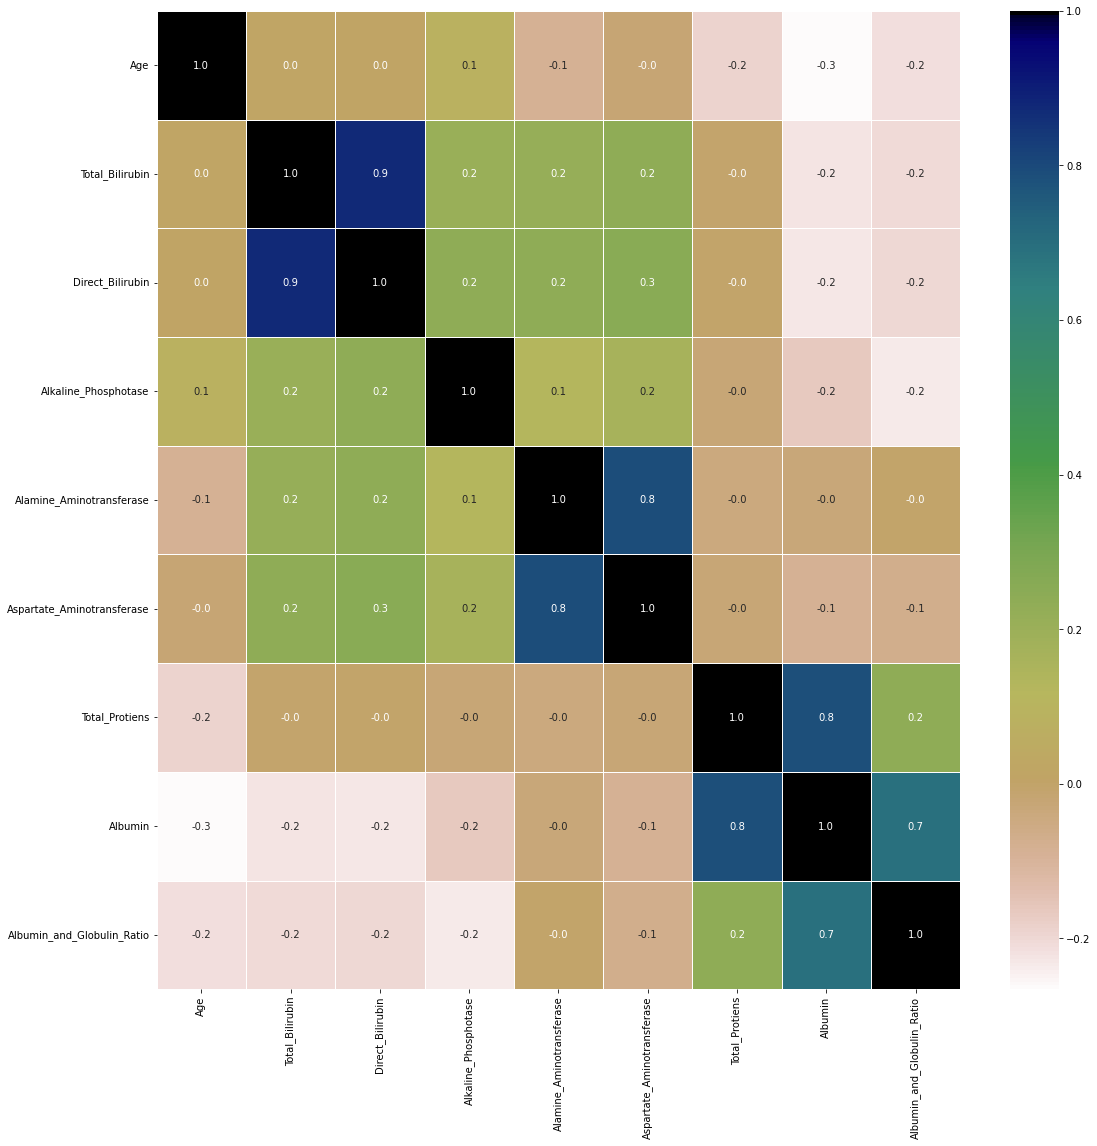

In [8]:
# Correlation between the features
temp_df = df.drop(["Dataset"],axis=1)
fig,ax = plt.subplots(figsize=(18,18))
sns.heatmap(temp_df.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax,cmap='gist_earth_r')

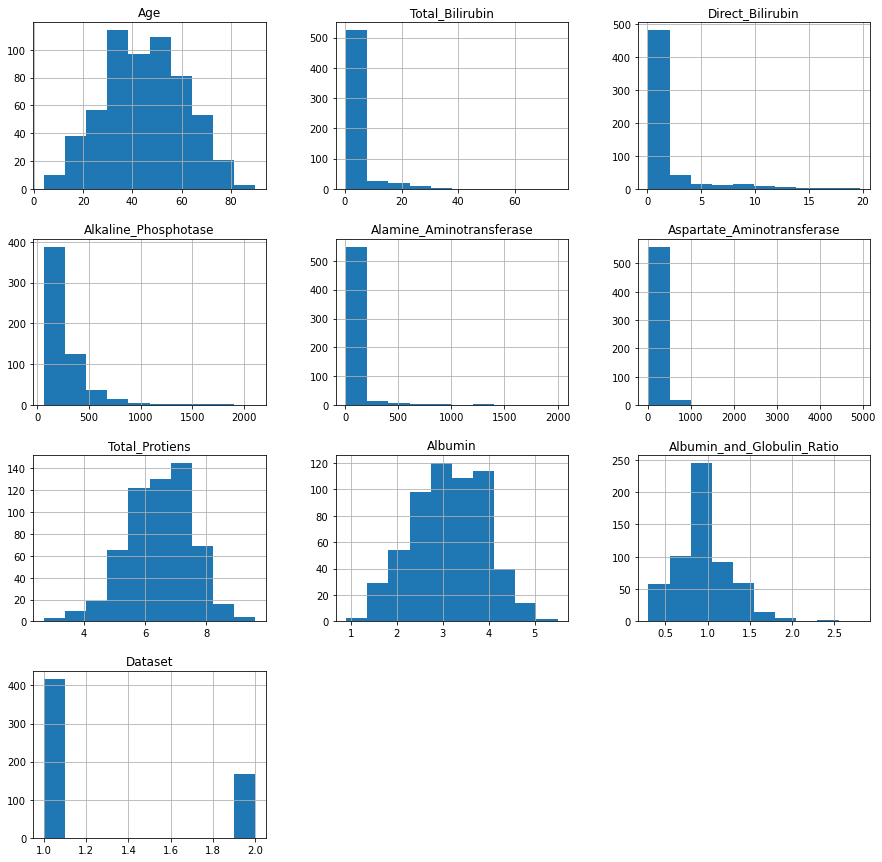

In [9]:
df.hist(figsize=(15,15))
plt.show()

In [10]:
# getting the data ready for model fitting
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [11]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [12]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x=='Male' else 0)
df = df.fillna(0.94) # for Albumin and Globulin ratio(Filling the mean)

In [13]:
X = df.drop(['Age','Gender','Dataset'],axis=1)
y = df['Dataset']
X.head()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,7.3,4.1,490,60,68,7.0,3.3,0.89
3,1.0,0.4,182,14,20,6.8,3.4,1.00
4,3.9,2.0,195,27,59,7.3,2.4,0.40


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

71.7948717948718


In [16]:
clf_report = classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        83
           2       0.53      0.26      0.35        34

    accuracy                           0.72       117
   macro avg       0.64      0.58      0.59       117
weighted avg       0.69      0.72      0.68       117



In [17]:
import joblib
joblib.dump(model,r"liver_model.pkl")

['liver_model.pkl']